In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
# subject 0, night 0
file = "sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# metadata
info = data.info
channels = data.ch_names
print("Metadata: \n ", data)
print(info)
print("Channels: ", channels)
#print("raw_data size: ", raw_data.shape)
# extract each channel
EEG_Cz = raw_data[0] * 1000000
EEG_Oz = raw_data[1] * 1000000
EOG = raw_data[2] * 1000000
Resp = raw_data[3]
EMG = raw_data[4]
Temp = raw_data[5]
Event = raw_data[6]
sf = 100.
time = np.arange(EEG_Cz.size) / sf

Extracting EDF parameters from c:\Users\flake\Documents\Homework\CSCI5622\Project Work\sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Metadata: 
  <RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>
Channels:  ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [3]:
mod = GaussianProcessRegressor()
n = 10000
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,1))
for i in range(n):
    Y[i]=EEG_Oz[i]
df = np.concatenate((X,Y),axis=1)

In [4]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

In [5]:
training_data[:,0]

array([82.39, 71.05, 51.76, ..., 29.34, 66.18, 85.1 ])

In [6]:
mod = GaussianProcessRegressor(alpha=1e-5)
mod.fit(training_data[:,0].reshape(-1,1),training_data[:,1])

GaussianProcessRegressor(alpha=1e-05)

In [7]:
y_hat = mod.predict(testing_data[:,0].reshape(-1,1))

In [8]:
err = []
for i in range(len(y_hat)):
    err.append((y_hat[i]-testing_data[i,1])**2)
np.mean(err)**0.5

7.001499102700029

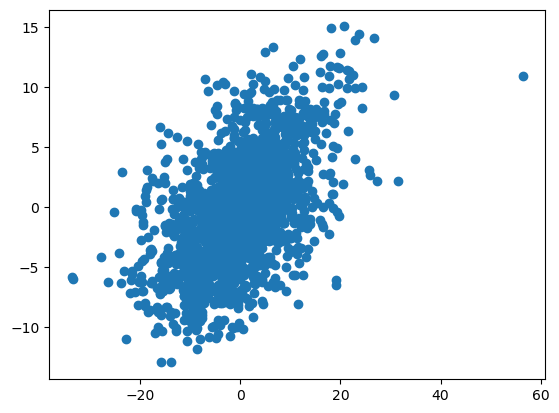

In [9]:
plt.plot(testing_data[:,1],y_hat,linestyle='None', marker='o')

In [10]:
alphas = [10**(a/4) for a in range(-54,-32)]
vec = []
alphas
for i in alphas:
    mod = GaussianProcessRegressor(alpha=i)
    mod.fit(training_data[:,0].reshape(-1,1),training_data[:,1]) 
    y_hat = mod.predict(testing_data[:,0].reshape(-1,1))
    err = []
    for i in range(len(y_hat)):
        err.append((y_hat[i]-testing_data[i,1])**2)
    q = np.mean(err)**0.5
    vec.append(q)

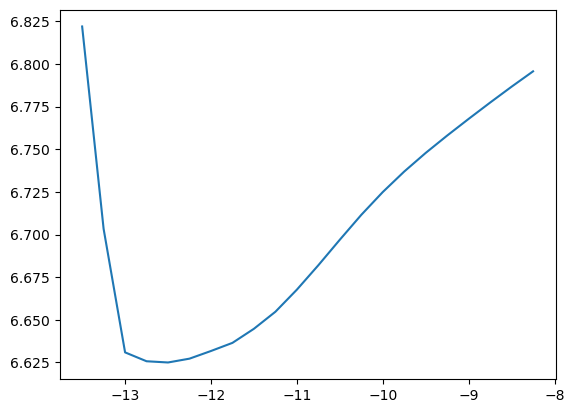

In [11]:
l_alphas = [np.log10(a) for a in alphas]
plt.plot(l_alphas, vec)

In [25]:
mod = GaussianProcessRegressor(alpha=10**(-12.5))
mod.fit(training_data[:,0].reshape(-1,1),training_data[:,1]) 
y_hat = mod.predict(testing_data[:,0].reshape(-1,1))
err = []
for i in range(len(y_hat)):
    err.append((y_hat[i]-testing_data[i,1])**2)
q = np.mean(err)**0.5

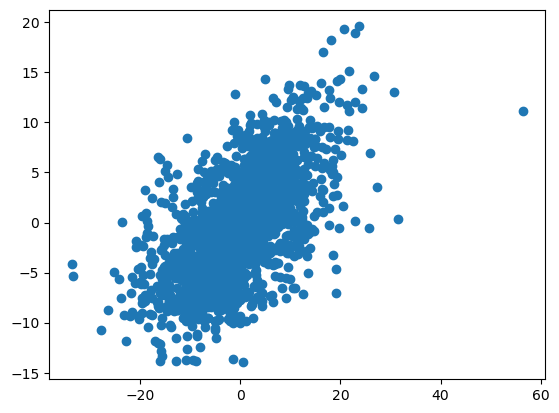

In [26]:
plt.plot(testing_data[:,1],y_hat,linestyle='None', marker='o')

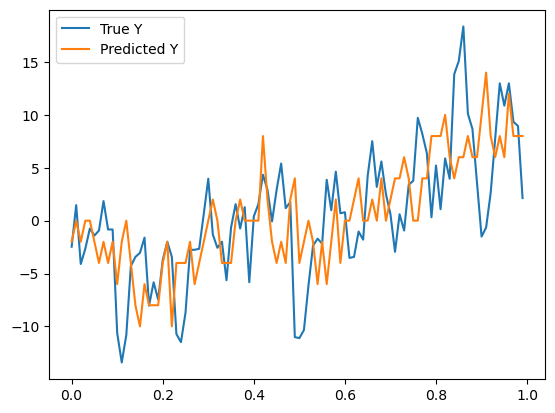

In [9]:
mod = GaussianProcessRegressor(alpha=2.5e-15)
n = 100
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

#Works pretty well

In [10]:
num = 0
den = 0
m = np.mean(Y)
for i in range(len(y_hat)):
    num = num + (Y[i]-y_hat[i])**2
    den = den + (Y[i]-m)**2
R2 = 1-(num/den)
R2

0.2717350704346806

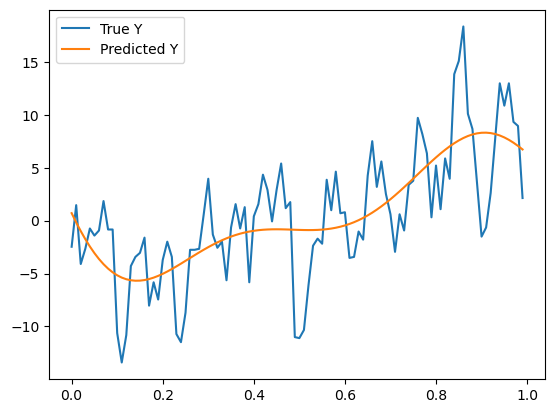

In [11]:
mod = GaussianProcessRegressor(alpha=2.5e-10)
n = 100
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

#Works pretty well

In [12]:
num = 0
den = 0
m = np.mean(Y)
for i in range(len(y_hat)):
    num = num + (Y[i]-y_hat[i])**2
    den = den + (Y[i]-m)**2
R2 = 1-(num/den)
R2

0.5145945726972381